### Challenge Description
We got employee data from a few companies. We have data about all employees who joined from 2011/01/24 to 2015/12/13. For each employee, we also know if they are still at the company as of 2015/12/13 or they have quit. Beside that, we have general info about the employee, such as avg salary during her tenure, dept, and yrs of experience.

As said above, the goal is to predict employee retention and understand its main drivers
Hints:
- What are the main factors that drive employee churn? Do they make sense? Explain your findings.
- What might you be able to do for the company to address employee Churn, what would be follow-up actions?
- If you could add to this data set just one variable that could help explain employee churn, what would that be?
- Your output should be in the form a a jupyter notebook and pdf output of a jupyter notebook in which you specify your results and how you got them.


Data
The table is:
"employee_retention" - comprehensive information about employees.
Columns:
- employee_id : id of the employee. Unique by employee per company 
- company_id : company id. 
- dept : employee dept 
- seniority : number of yrs of work experience when hired 
- salary: avg yearly salary of the employee during her tenure within the company 
- join_date: when the employee joined the company, it can only be between 2011/01/24 and 2015/12/13 
- quit_date: when the employee left her job (if she is still employed as of 2015/12/13, this field is NA)


## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
!ls Data

employee_retention_data.csv


In [3]:
df = pd.read_csv("Data/employee_retention_data.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
employee_id    24702 non-null float64
company_id     24702 non-null int64
dept           24702 non-null object
seniority      24702 non-null int64
salary         24702 non-null float64
join_date      24702 non-null object
quit_date      13510 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 1.3+ MB


In [5]:
## Clean the empty entries
df = df.loc[(df.join_date < "2013-12-13")].fillna("2015-12-13")
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14633 entries, 1 to 24701
Data columns (total 7 columns):
employee_id    14633 non-null float64
company_id     14633 non-null int64
dept           14633 non-null object
seniority      14633 non-null int64
salary         14633 non-null float64
join_date      14633 non-null object
quit_date      14633 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 914.6+ KB


In [6]:
df["dept_id"] = df.dept.astype("category").cat.codes

['marketing' 'customer_service' 'data_science' 'engineer' 'sales' 'design']
[4 0 1 3 5 2]


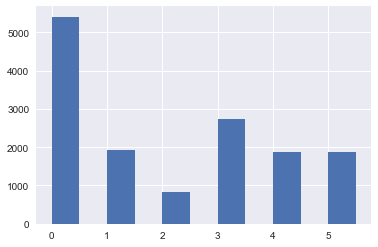

In [7]:
## find all the departments
print(df.dept.unique())
print(df.dept_id.unique())
plt.clf()
plt.hist(df.dept_id, bins=np.arange(0, 6, 0.5))
plt.show()

[ 7  2  4  9  1  6 10  5  3  8 11 12]


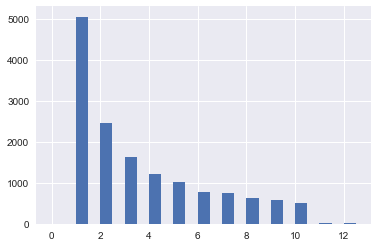

In [8]:
## find all the companies
print(df.company_id.unique())
plt.clf()
plt.hist(df.company_id, bins=np.arange(0, 13, 0.5))
plt.show()

In [9]:
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,dept_id
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,4
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,0
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1
5,509529.0,4,data_science,14,165000.0,2012-01-30,2013-08-30,1
6,88600.0,4,customer_service,21,107000.0,2013-10-21,2015-12-13,0


In [10]:
df["quit_date"] = pd.to_datetime(df['quit_date'])
df["join_date"] = pd.to_datetime(df['join_date'])

In [11]:
df["duration"] = pd.to_numeric((df["quit_date"] - df["join_date"]).dt.days, downcast='integer')
df["duration"] = df["duration"]/30
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,dept_id,duration
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,4,11.333333
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,0,12.966667
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1,34.666667
5,509529.0,4,data_science,14,165000.0,2012-01-30,2013-08-30,1,19.266667
6,88600.0,4,customer_service,21,107000.0,2013-10-21,2015-12-13,0,26.100000


In [12]:
df = df.drop(["employee_id"], axis=1)
df = df.drop(["join_date", "quit_date"], axis=1)
df = df.drop(["dept"], axis=1)

In [13]:
df["duration"] = np.rint(df["duration"])

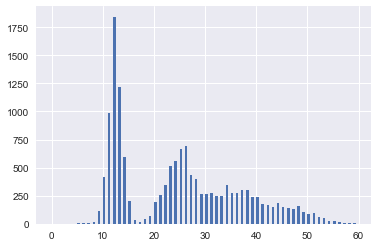

In [14]:
## check the duraiton distribution
plt.clf()
plt.hist(df.duration, bins=np.arange(0, 60, 0.5))
plt.show()

In [15]:
## descrete duration based on this distribution
## two categories, early quit less than 1.5 years, or at least 2 years
df.loc[(df['duration'] >= 0) & (df['duration'] <= 17), 'duration']     = 0
df.loc[(df['duration'] > 17), 'duration']                              = 1
#df.loc[(df['duration'] > 17) & (df['duration'] <= 30), 'duration']     = 1
#df.loc[(df['duration'] >= 30), 'duration']                             = 2
df['duration'] = df['duration'].astype(int)

In [16]:
## keep only one company
##df = df.loc[(df['company_id'] == 1) & (df['dept_id'] == 1)]
## keep only one department
df = df.loc[(df['dept_id'] == 1)]

/Users/renormalization/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


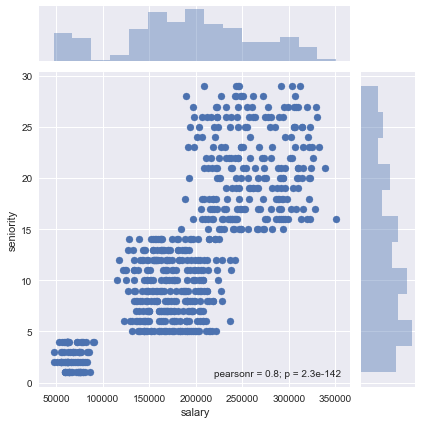

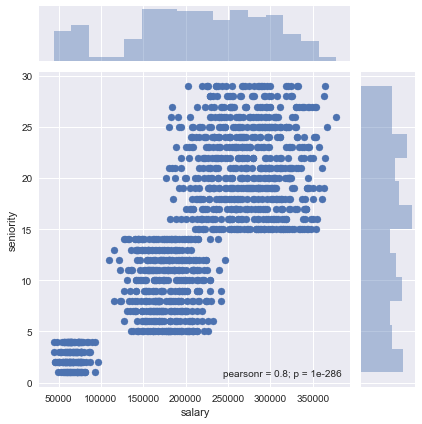

In [17]:
sns.jointplot(x="salary", y="seniority", data=df.loc[(df['duration'] == 0)])
sns.jointplot(x="salary", y="seniority", data=df.loc[(df['duration'] == 1)])

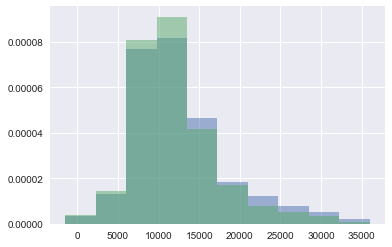

In [43]:
plt.clf()
n, bins, patches = plt.hist((df.loc[(df['duration'] == 0)].salary - 50000)/df.loc[(df['duration'] == 0)].seniority, alpha=0.5, density=True)
plt.hist((df.loc[(df['duration'] == 1)].salary - 50000)/df.loc[(df['duration'] == 1)].seniority, alpha=0.5, density=True, bins=bins)
plt.show()

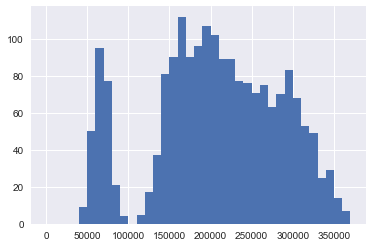

In [35]:
## check the salary distribution
plt.clf()
plt.hist(df.salary, bins=np.arange(0, 379000, 10000))
plt.show()

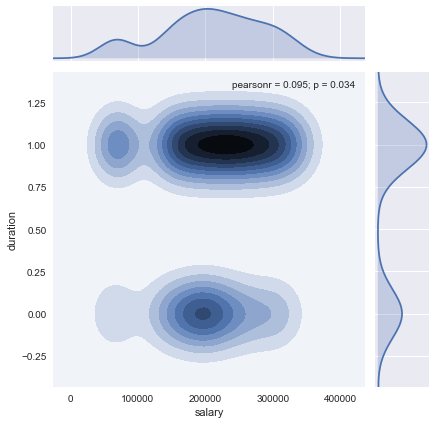

In [36]:
sns.jointplot(x="salary", y="duration", data=df[:500], kind="kde")

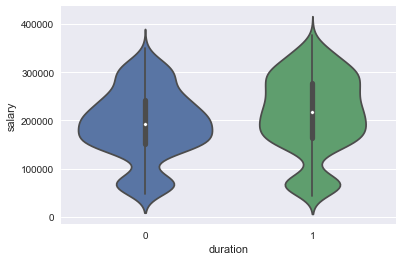

In [37]:
sns.violinplot(x="duration",  y="salary",  data=df[:3000])

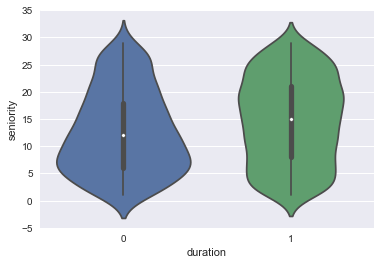

In [38]:
sns.violinplot(x="duration",  y="seniority",  data=df[:3000])

In [23]:
print(df.shape)
df.head()

(1932, 5)


,company_id,seniority,salary,dept_id,duration
4,2,23,276000.0,1,1
5,4,14,165000.0,1,1
22,5,14,144000.0,1,1
26,4,26,230000.0,1,1
27,3,27,223000.0,1,0


In [39]:
#df = df.drop(["company_id", "dept_id"], axis=1)
df["salperseninor"] = (df.salary - 50000)/1000/df.seniority**2
df.describe()

,company_id,seniority,salary,dept_id,duration,salperseninor
count,1932.000000,1932.000000,1932.000000,1932.0,1932.000000,1932.000000
mean,3.414596,14.108696,206436.335404,1.0,0.667184,1.811438
std,2.692886,7.901228,77626.137871,0.0,0.471343,3.530281
min,1.000000,1.000000,44000.000000,1.0,0.000000,-1.000000
25%,1.000000,7.000000,159000.000000,1.0,0.000000,0.493070
50%,2.000000,14.000000,208000.000000,1.0,1.000000,0.799062
75%,5.000000,21.000000,267000.000000,1.0,1.000000,1.742500
max,12.000000,29.000000,378000.000000,1.0,1.000000,43.000000


In [25]:
from sklearn.model_selection import train_test_split

def pack_data(df, keyword="duration", split=0.1, shuffle=True, SEED = 24):
    '''For training preparation:
    split data, and return a dictionary, 
    containing training, testing and validation
    seed for reproducibility
    '''
    data = {}
    df_X = df.drop(keyword, axis=1).copy()
    df_y = df[keyword].copy()
    X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, train_size=1 - split, test_size=split, random_state=SEED, shuffle=shuffle)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=1 - split, test_size=split, random_state=SEED, shuffle=shuffle)
    data["X_train"] = X_train.values
    data["y_train"] = y_train.values
    #print(data["y_train"])
    data["X_val"]   = X_val.values
    data["y_val"]   = y_val.values
    data["X_test"]  = X_test.values
    data["y_test"]  = y_test.values
    return data

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [27]:
data = pack_data(df)
y_train  = data["y_train"]
x_train  = data["X_train"] # Creates an array of the train data
x_val    = data["X_val"] # Creats an array of the test data
y_val    = data["y_val"] # Creats an array of the test data

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        61
          1       0.65      1.00      0.79       113

avg / total       0.42      0.65      0.51       174

ROC area 0.563325112433


/Users/renormalization/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


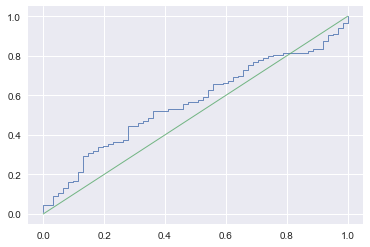

In [28]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
print(metrics.classification_report(y_val, lr.predict(x_val)))
probas_ = lr.predict_proba(x_val)
# Compute ROC curve and area the curve
fpr, tpr, thresholds = metrics.roc_curve(y_val, probas_[:, 1])
plt.plot(fpr, tpr, lw=1, alpha=0.8)
plt.plot([0, 1], [0, 1], lw=1, alpha=0.8)
print("ROC area", metrics.auc(fpr, tpr))

In [29]:
import xgboost as xgb

In [30]:
xgbR = xgb.XGBClassifier(max_depth=4, n_estimators=100, learning_rate=0.01, gamma=0.1)
xgbR.fit(x_train, y_train)
print(metrics.classification_report(y_val, xgbR.predict(x_val)))

             precision    recall  f1-score   support

          0       0.43      0.10      0.16        61
          1       0.66      0.93      0.77       113

avg / total       0.58      0.64      0.56       174



ROC area 0.578267807921


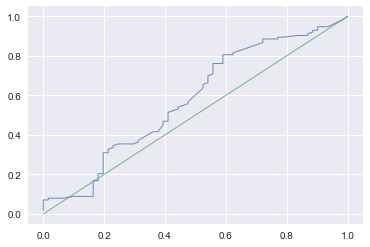

In [31]:
probas_ = xgbR.predict_proba(x_val)
# Compute ROC curve and area the curve
fpr, tpr, thresholds = metrics.roc_curve(y_val, probas_[:, 1])
plt.plot(fpr, tpr, lw=1, alpha=0.8)
plt.plot([0, 1], [0, 1], lw=1, alpha=0.8)
print("ROC area", metrics.auc(fpr, tpr))

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf = RandomForestClassifier(max_depth=4, random_state=0, n_estimators=40)
rf.fit(x_train, y_train)
print(metrics.classification_report(y_val, rf.predict(x_val)))

             precision    recall  f1-score   support

          0       1.00      0.02      0.03        61
          1       0.65      1.00      0.79       113

avg / total       0.77      0.66      0.52       174



ROC area 0.593935876977


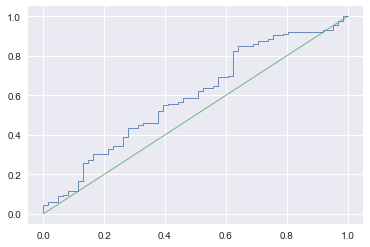

In [34]:
probas_ = rf.predict_proba(x_val)
# Compute ROC curve and area the curve
fpr, tpr, thresholds = metrics.roc_curve(y_val, probas_[:, 1])
plt.plot(fpr, tpr, lw=1, alpha=0.8)
plt.plot([0, 1], [0, 1], lw=1, alpha=0.8)
print("ROC area", metrics.auc(fpr, tpr))